___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, f1_score, roc_auc_score
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import missingno as msno

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [6]:
# This function calculates total number of missing values and its percentage for each feature

def perc_miss_values (df):
    miss_number = df.isnull().sum().sort_values(ascending=False)
    miss_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    miss_values = pd.concat([miss_number, miss_percent], axis=1, keys=['Miss_Number', 'Miss_Percent'])
    return miss_values

In [7]:
# This function gives the summary of missing values and unique values for a given feature

def review_values(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [8]:
df0 = pd.read_csv('ANSUR II MALE Public.csv',encoding='latin-1')
df0.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [9]:
df0.shape

(4082, 108)

In [10]:
df0.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [11]:
df1 = pd.read_csv('ANSUR II FEMALE Public.csv',encoding='latin-1')
df1.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [12]:
df1.shape

(1986, 108)

In [13]:
pd.DataFrame(df1.columns)

,0
0,SubjectId
1,abdominalextensiondepthsitting
2,acromialheight
3,acromionradialelength
4,anklecircumference
5,axillaheight
6,balloffootcircumference
7,balloffootlength
8,biacromialbreadth
9,bicepscircumferenceflexed


In [14]:
print(df0.columns==df1.columns)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [15]:
df0.columns = df0.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [16]:
df1.columns = df1.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [17]:
df = df0.append(df1, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [18]:
df.shape

(6068, 108)

Two seprate CSV files are merged into one and one dataframe is created for further analysis.

## Explore Data

There are 99 integer and 9 object type features.

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

The ranges of features are very variable and before modelling phase scaling options shouuld be taken into account.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0000000,20757.1984179,13159.3908939,10027.0000000,14841.7500000,20063.5000000,27234.5000000,920103.0000000
abdominalextensiondepthsitting,6068.0000000,246.4686882,37.4001061,155.0000000,219.0000000,242.0000000,271.0000000,451.0000000
acromialheight,6068.0000000,1406.1613382,79.0910484,1115.0000000,1350.0000000,1410.0000000,1462.0000000,1683.0000000
acromionradialelength,6068.0000000,327.3744232,20.7200182,249.0000000,313.0000000,328.0000000,341.2500000,393.0000000
anklecircumference,6068.0000000,224.8913975,16.0518333,156.0000000,214.0000000,225.0000000,235.0000000,293.0000000
axillaheight,6068.0000000,1299.6087673,72.0222861,1038.0000000,1249.0000000,1302.0000000,1349.0000000,1553.0000000
balloffootcircumference,6068.0000000,244.1926500,16.8450202,186.0000000,232.0000000,245.0000000,256.0000000,306.0000000
balloffootlength,6068.0000000,194.7546144,13.5163681,151.0000000,185.0000000,195.0000000,204.0000000,245.0000000
biacromialbreadth,6068.0000000,399.2041859,30.2369141,283.0000000,376.0000000,404.0000000,421.0000000,489.0000000
bicepscircumferenceflexed,6068.0000000,340.9342452,41.5198658,216.0000000,311.0000000,341.0000000,370.0000000,490.0000000


Let us check unique values of all features.

In [21]:
df.nunique().sort_values(ascending=False)

subjectid                         6068
weightkg                           783
waistcircumference                 581
span                               569
verticaltrunkcircumferenceusa      522
chestcircumference                 521
stature                            481
shouldercircumference              458
overheadfingertipreachsitting      452
cervicaleheight                    452
acromialheight                     432
buttockcircumference               429
suprasternaleheight                427
chestheight                        421
axillaheight                       402
functionalleglength                383
tenthribheight                     351
waistheightomphalion               350
iliocristaleheight                 345
thighcircumference                 343
forearmforearmbreadth              335
buttockheight                      322
trochanterionheight                321
crotchheight                       318
thumbtipreach                      314
sleevelengthspinewrist   

In [22]:
#There is no duplicate values
df.duplicated().value_counts()

False    6068
dtype: int64

Missing values should be evaluated and the features with more missing values should be dropped as they dont provide enough information.

In [23]:
perc_miss_values (df)

,Miss_Number,Miss_Percent
ethnicity,4647,0.7658207
subjectid,0,0.0000000
radialestylionlength,0,0.0000000
thighcircumference,0,0.0000000
tenthribheight,0,0.0000000
suprasternaleheight,0,0.0000000
stature,0,0.0000000
span,0,0.0000000
sleeveoutseam,0,0.0000000
sleevelengthspinewrist,0,0.0000000


In [24]:
df.ethnicity.value_counts(dropna=False)

NaN                                                   4647
Mexican                                                357
Puerto Rican                                           183
Caribbean Islander                                     124
Filipino                                                67
Cherokee                                                65
Korean                                                  53
Dominican                                               32
Chinese                                                 26
Japanese                                                22
Vietnamese                                              21
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  17
Salvadoran                                              16
East/Asian Indian                                       13
Samoan                                                  

Let us drop ethnicity and subjectid. Because ethnicity has more than 50% missing values and subjectid could be represented by index of the dataframe

In [25]:
df.drop(['ethnicity','subjectid'],axis=1,inplace=True)

In [26]:
df.shape

(6068, 106)

dodrace column contains the information about races. Mainly, there are 6 race types. The rest are stored in 'Other'.
1: "White",
2: "Black",
3: "Hispanic",
4: "Asian",
5: "Native American",
6: "Pacific Islander",
8: "Other"
From the frequency of values in dodrace, it can be seen that white, black and hispanic races are three major races. And the other values would not provide enough information in modelling phase.

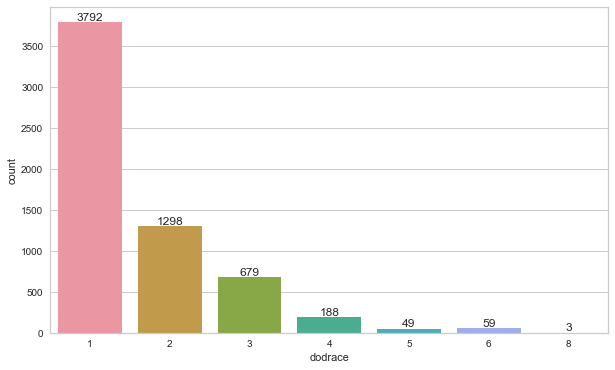

In [27]:
ax=sns.countplot(data=df,x='dodrace')
ax.bar_label(ax.containers[0])
plt.show();

Now, let us focus on object types. For further analysis, let us evaluate object features with respect to race types.

In [28]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

primarymos               285
date                     253
subjectsbirthlocation    152
installation              12
component                  3
branch                     3
writingpreference          3
gender                     2
dtype: int64

In [29]:
#convert numeric values to string values
df["dodrace"] = df.dodrace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [30]:
df.groupby(["component"])["dodrace"].value_counts(normalize=True)

component            dodrace         
Army National Guard  White              0.6850074
                     Black              0.1842688
                     Hispanic           0.0934269
                     Asian              0.0221566
                     Native American    0.0088626
                     Pacific Islander   0.0062777
Army Reserve         White              0.5181818
                     Black              0.2363636
                     Hispanic           0.1863636
                     Asian              0.0409091
                     Pacific Islander   0.0136364
                     Native American    0.0045455
Regular Army         White              0.5805732
                     Black              0.2378981
                     Hispanic           0.1226115
                     Asian              0.0378981
                     Pacific Islander   0.0124204
                     Native American    0.0076433
                     Other              0.0009554
Name: dodrac

<AxesSubplot:ylabel='component,dodrace'>

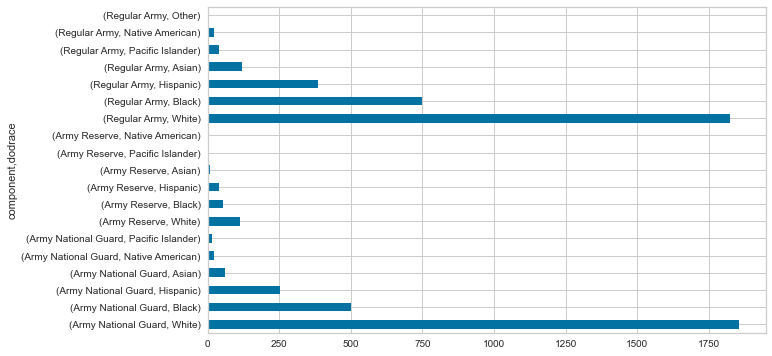

In [31]:
df.groupby(["component"])["dodrace"].value_counts().plot(kind="barh")

The feature of ___'component'___ would provide any information in order to differentiate between 'Regular Army', 'Army Reserve' and 'Army National Guard'. Because, for each value of 'component' it has similar distribution of races. Therefore, it could be dropped.

Let us add one more dimension to the analysis by adding 'branch'.

<AxesSubplot:ylabel='component,branch,dodrace'>

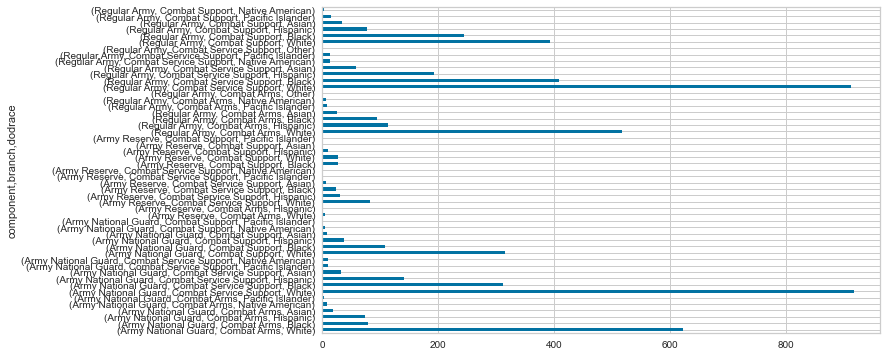

In [32]:
df.groupby(["component", "branch"])["dodrace"].value_counts().plot(kind="barh")

For each pair of 'component' and 'branch', similar pattern appears with respect to race distribution. Therefore, there is no gain to keep these object types. Futhermore, "date", "installation" and "primarymos" are irrelavant to race classifications. Let us drop them.

In [33]:
df.drop(['component','branch','date', 'installation','primarymos'],axis=1,inplace=True)

In [34]:
df.shape

(6068, 101)

In [35]:
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356
bicristalbreadth,274,257,261,262,263


In dataframe, there are 'weightlbs' and 'weightkg'. Let us drop 'weightlbs'.

In [36]:
df.drop(['weightlbs'],axis=1,inplace=True)

'subjectnumericrace' information is not necessary since there is 'dodrace'. Let us drop it.

In [37]:
df.subjectnumericrace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: subjectnumericrace, dtype: int64

In [38]:
df.drop(['subjectnumericrace'],axis=1,inplace=True)

'age' and 'writingpreference' has nothing with race classifications. Let us drop both of them.

In [39]:
df.drop(['age','writingpreference'],axis=1,inplace=True)

Finally, let us reduce the race values to 'white', 'black' and 'hispanic'.

In [40]:
df= df[(df["dodrace"] == "White") | (df["dodrace"] == "Black") | (df["dodrace"] == "Hispanic")]
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356
bicristalbreadth,274,257,261,262,263


In [41]:
df.shape

(5769, 97)

In [42]:
#the index should be reset
df.reset_index(drop=True, inplace=True)

In [43]:
df.tail()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,dodrace,heightin
5764,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,456,1085,81,197,193,151,582,205,321,75,381,413,1048,615,373,390,462,535,486,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,Hispanic,67
5765,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,261,514,440,985,81,196,183,160,570,186,296,61,347,377,974,650,400,411,433,483,457,58,383,130,359,399,1323,99,377,237,1051,318,142,881,794,525,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,Female,Texas,Hispanic,63
5766,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,1166,793,609,326,39,62,18,204,739,97,249,338,288,530,459,1050,82,192,191,144,559,190,318,72,364,400,986,640,400,412,450,517,476,57,412,111,352,402,1318,116,392,259,1054,338,136,841,848,566,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,Female,Texas,Black,66
5767,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,1137,763,575,310,35,62,21,222,738,91,226,306,258,430,425,995,74,177,176,149,558,186,280,59,369,411,971,640,383,418,432,491,445,58,400,119,326,380,1286,111,375,230,996,321,136,854,791,530,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,Female,Texas,Hispanic,63
5768,238,1346,308,210,1256,236,188,361,285,279,433,71,304,278,129,974,217,820,586,479,343,1401,272,902,219,1186,783,536,307,35,58,23,243,754,100,239,314,259,464,439,1053,78,187,177,148,561,189,310,78,332,376,994,595,333,373,444,504,445,66,372,114,325,381,1372,112,390,249,997,339,135,861,821,542,1685,1641,1334,1089,592,162,762,436,130,849,1547,462,299,891,223,394,943,610,154,797,Female,Texas,Hispanic,66


<AxesSubplot:>

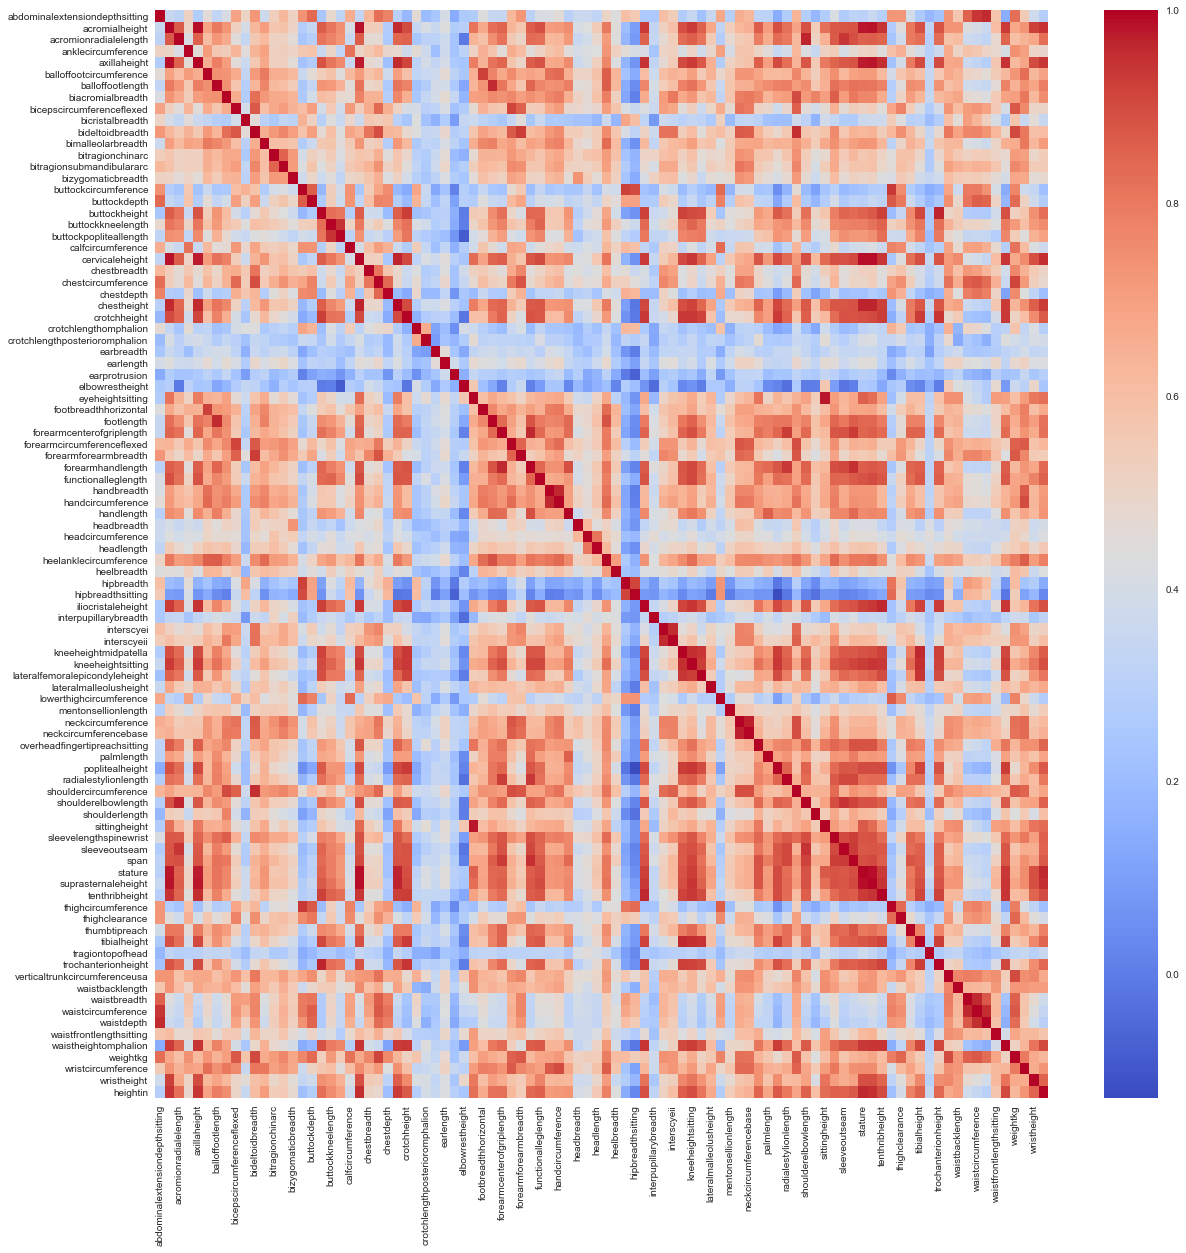

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [45]:
X = df.drop("dodrace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.dodrace

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [47]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 230)
Train target shape   :  (4615,)
Test features shape  :  (1154, 230)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

Define evaluation metric function:

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [61]:
#set pipeline with parameters
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [62]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 112  19]
 [ 25  91 642]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 965   40   33]
 [  23  453   67]
 [  58  353 2623]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [90]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [66]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5925791
test_precision_Hispanic   0.4868270
test_recall_Hispanic      0.7623232
dtype: float64

__Summary:__ The main focus is to determine hsipanics among others. Recall scores is the main attention. The logistic model indicates that test set has 82% accuracy in predicting hispanics. Moreover, cross validation also supports the robustness of the prediction with racall value of 76%. Now let us make a grid search over logistic model.

### Logistic Model GridsearchCV

In [78]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [68]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [69]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [70]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [71]:
log_model_grid.best_params_

{'log__C': 5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [72]:
log_model_grid.best_score_

0.773394495412844

In [73]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  6 110  20]
 [ 26  85 647]]
              precision    recall  f1-score   support

       Black       0.88      0.93      0.90       260
    Hispanic       0.53      0.81      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 972   41   25]
 [  17  461   65]
 [  63  333 2638]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



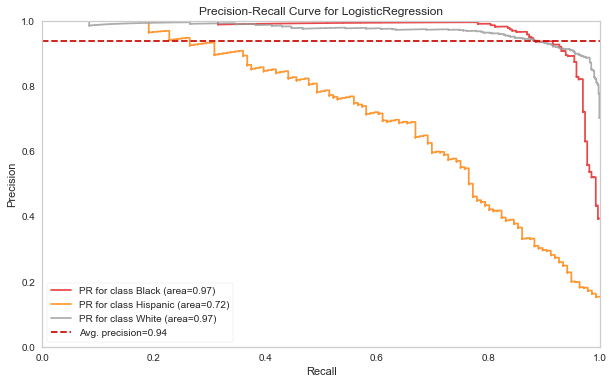

In [74]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [75]:
#["Hispanic"]
viz.score_

{'Black': 0.9717149275084691,
 'Hispanic': 0.7213615832146112,
 'White': 0.9715993398836308,
 'micro': 0.9364313204786784}

__Summary:__ Grid search has almost similar results. So, let us store the scores to compare model scores at the end.

In [76]:
y_pred = log_model_grid.predict(X_test)
log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [80]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [81]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  11   9]
 [  2 113  21]
 [ 18 105 635]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.49      0.83      0.62       136
       White       0.95      0.84      0.89       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 960   39   39]
 [  26  449   68]
 [  52  428 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [82]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5704723
test_precision_Hispanic   0.4569378
test_recall_Hispanic      0.7622896
dtype: float64

###  SVC Model GridsearchCV

In [83]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [84]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [85]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [86]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 0.01}

In [87]:
svm_model_grid.best_score_

0.7605164797825348

In [88]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  11  11]
 [  3 110  23]
 [ 23 112 623]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.47      0.81      0.60       136
       White       0.95      0.82      0.88       758

    accuracy                           0.84      1154
   macro avg       0.77      0.85      0.80      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 939   48   51]
 [  31  432   80]
 [  56  453 2525]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91      1038
    Hispanic       0.46      0.80      0.59       543
       White       0.95      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.78      0.84      0.79      4615
weighted avg       0.89      0.84      0.86      4615



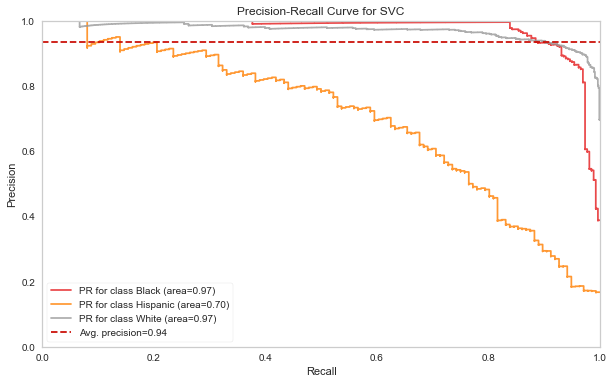

In [89]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

__Summary:__ SVC model has similar recall score than logistic model. But, this time precision score a little bit lower. Now, store the scores for final comparision.

In [90]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [91]:
from sklearn.preprocessing import OrdinalEncoder

In [92]:
X2 = df.drop("dodrace",axis=1)
y = df.dodrace

In [93]:
cat = X2.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation'], dtype='object')

In [94]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,heightin
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0000000,91.0000000,71
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0000000,86.0000000,68
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0000000,86.0000000,68
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0000000,133.0000000,66
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0000000,90.0000000,77


In [95]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [96]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 96)
Train target shape   :  (4615,)
Test features shape  :  (1154, 96)
Test target shape    :  (1154,)


### Vanilla RF Model

In [97]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [98]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [99]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[189   1  70]
 [ 11   7 118]
 [  8   2 748]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.70      0.05      0.10       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.80      0.59      0.60      1154
weighted avg       0.81      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [100]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.0823885
test_precision_Hispanic   0.7616667
test_recall_Hispanic      0.0442424
dtype: float64

### RF Model GridsearchCV

In [101]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [102]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [103]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [104]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [105]:
rf_grid_model.best_score_

0.23389398572884815

In [106]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[209   3  48]
 [ 15  34  87]
 [ 20  29 709]]
              precision    recall  f1-score   support

       Black       0.86      0.80      0.83       260
    Hispanic       0.52      0.25      0.34       136
       White       0.84      0.94      0.89       758

    accuracy                           0.82      1154
   macro avg       0.74      0.66      0.68      1154
weighted avg       0.81      0.82      0.81      1154


Train_Set
[[1021    1   16]
 [   0  528   15]
 [   2   21 3011]]
              precision    recall  f1-score   support

       Black       1.00      0.98      0.99      1038
    Hispanic       0.96      0.97      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.98      0.98      4615
weighted avg       0.99      0.99      0.99      4615



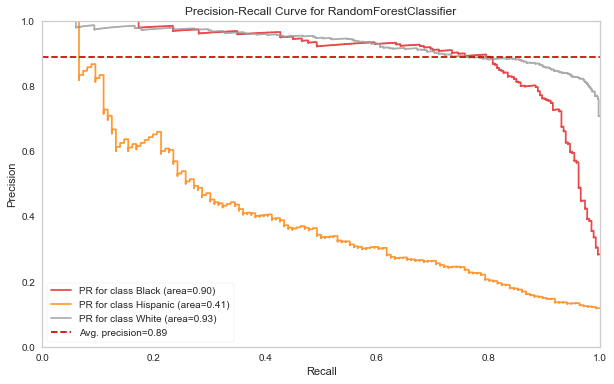

In [107]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

__Summary:__ RF model recall score for hispanic considerably drops and grid search has not improved it very much. But in this model the precision score is greater than SVC model. Now, store the scores.

In [108]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [109]:
import xgboost as xgb

In [110]:
xgb_model = XGBClassifier(random_state=101)

In [113]:
#class weight is not available for multi classes. Import new module to balance classes.
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [114]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0        
Black     1.4820167    1038
Hispanic  2.8330264     543
White     0.5070314    3034
Name: 0, dtype: int64

In [115]:
#Assign the weight of each class to its instances
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [116]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[231  12  17]
 [  9  86  41]
 [ 40 110 608]]
              precision    recall  f1-score   support

       Black       0.82      0.89      0.86       260
    Hispanic       0.41      0.63      0.50       136
       White       0.91      0.80      0.85       758

    accuracy                           0.80      1154
   macro avg       0.72      0.77      0.74      1154
weighted avg       0.83      0.80      0.81      1154


Train_Set
[[ 972   29   37]
 [  17  465   61]
 [  83  344 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.55      0.86      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [117]:
model = XGBClassifier(random_state=101)
#put into new weights into model with using fit_params
scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5130858
test_precision_Hispanic   0.4296324
test_recall_Hispanic      0.6387542
dtype: float64

### XGBoost Model GridsearchCV

In [118]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [119]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [120]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [121]:
xgb_grid_model.best_score_

0.6519537886510364

In [122]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[221  22  17]
 [ 14  87  35]
 [ 50 141 567]]
              precision    recall  f1-score   support

       Black       0.78      0.85      0.81       260
    Hispanic       0.35      0.64      0.45       136
       White       0.92      0.75      0.82       758

    accuracy                           0.76      1154
   macro avg       0.68      0.75      0.70      1154
weighted avg       0.82      0.76      0.78      1154


Train_Set
[[ 895   81   62]
 [  44  400   99]
 [ 139  523 2372]]
              precision    recall  f1-score   support

       Black       0.83      0.86      0.85      1038
    Hispanic       0.40      0.74      0.52       543
       White       0.94      0.78      0.85      3034

    accuracy                           0.79      4615
   macro avg       0.72      0.79      0.74      4615
weighted avg       0.85      0.79      0.81      4615



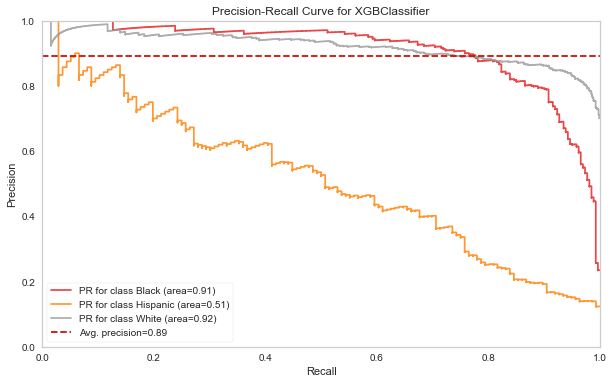

In [123]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

__Summary:__ XGBoost model has not improved recall scores for hispanic race detection. Moreover, all scores are not better than logistc and SVC models.

In [124]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

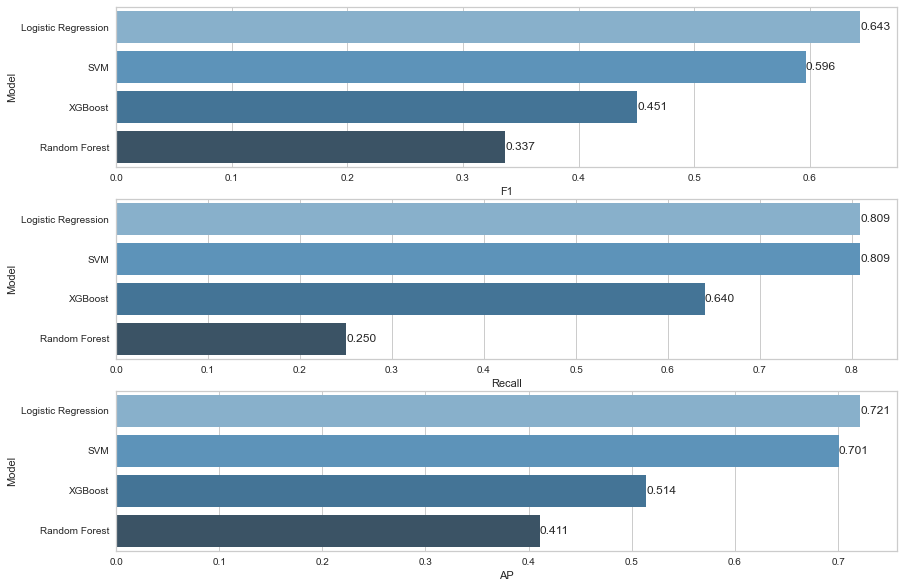

In [125]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

__Decision:__ Considering all scores together, logistic model outperforms the other models. Therefore, logistic model would be selected.

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [126]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [127]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [128]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,heightin,gender_Male,subjectsbirthlocation_Alaska,subjectsbirthlocation_Antigua and Barbuda,subjectsbirthlocation_Argentina,subjectsbirthlocation_Arizona,subjectsbirthlocation_Arkansas,...,subjectsbirthlocation_Ethiopia,subjectsbirthlocation_Florida,subjectsbirthlocation_France,subjectsbirthlocation_French Guiana,subjectsbirthlocation_Georgia,subjectsbirthlocation_Germany,subjectsbirthlocation_Ghana,subjectsbirthlocation_Grenada,subjectsbirthlocation_Guadalupe,subjectsbirthlocation_Guam,subjectsbirthlocation_Guatemala,subjectsbirthlocation_Guyana,subjectsbirthlocation_Haiti,subjectsbirthlocation_Hawaii,subjectsbirthlocation_Honduras,subjectsbirthlocation_Iceland,subjectsbirthlocation_Idaho,subjectsbirthlocation_Illinois,subjectsbirthlocation_India,subjectsbirthlocation_Indiana,subjectsbirthlocation_Iowa,subjectsbirthlocation_Iran,subjectsbirthlocation_Iraq,subjectsbirthlocation_Israel,subjectsbirthlocation_Italy,subjectsbirthlocation_Ivory Coast,subjectsbirthlocation_Jamaica,subjectsbirthlocation_Japan,subjectsbirthlocation_Kansas,subjectsbirthlocation_Kentucky,subjectsbirthlocation_Kenya,subjectsbirthlocation_Lebanon,subjectsbirthlocation_Liberia,subjectsbirthlocation_Louisiana,subjectsbirthlocation_Maine,subjectsbirthlocation_Maryland,subjectsbirthlocation_Massachusetts,subjectsbirthlocation_Mexico,subjectsbirthlocation_Michigan,subjectsbirthlocation_Minnesota,subjectsbirthlocation_Mississippi,subjectsbirthlocation_Missouri,subjectsbirthlocation_Montana,subjectsbirthlocation_Morocco,subjectsbirthlocation_Nebraska,subjectsbirthlocation_Netherlands,subjectsbirthlocation_Nevada,subjectsbirthlocation_New Hampshire,subjectsbirthlocation_New Jersey,subjectsbirthlocation_New Mexico,subjectsbirthlocation_New York,subjectsbirthlocation_New Zealand,subjectsbirthlocation_Nicaragua,subjectsbirthlocation_Nigeria,subjectsbirthlocation_North Carolina,subjectsbirthlocation_North Dakota,subjectsbirthlocation_Ohio,subjectsbirthlocation_Oklahoma,subjectsbirthlocation_Oregon,subjectsbirthlocation_Panama,subjectsbirthlocation_Paraguay,subjectsbirthlocation_Pennsylvania,subjectsbirthlocation_Peru,subjectsbirthlocation_Philippines,subjectsbirthlocation_Poland,subjectsbirthlocation_Portugal,subjectsbirthlocation_Puerto Rico,subjectsbirthlocation_Rhode Island,subjectsbirthlocation_Romania,subjectsbirthlocation_Russia,subjectsbirt

In [135]:
#since the number of features is very high, let us generate a sample with average values.
avg_human = X.describe().loc["mean"]
avg_human

abdominalextensiondepthsitting                  247.2542902
acromialheight                                 1408.6302652
acromionradialelength                           328.0715895
anklecircumference                              225.2017681
axillaheight                                   1301.9025828
balloffootcircumference                         244.4080430
balloffootlength                                195.1189114
biacromialbreadth                               399.7060149
bicepscircumferenceflexed                       341.6630265
bicristalbreadth                                274.9034495
bideltoidbreadth                                491.4548449
bimalleolarbreadth                               72.3354134
bitragionchinarc                                324.9622118
bitragionsubmandibulararc                       306.6777604
bizygomaticbreadth                              139.5293812
buttockcircumference                           1022.0594557
buttockdepth                            

In [130]:
final_model.predict([avg_human])

array(['White'], dtype=object)

In [131]:
y[201]

'Hispanic'

In [132]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [133]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7764554577619988

In [134]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7666332836256183

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

Imbalance data labels should be addressed very carefully. One way is to increase the number of samples in order to blance the labels. Another way is to decrease the samples so that there is balanced classes. But, both of them can create problems. The best way is to increase to a certain degreee or decrease to a certain degree so that the effects of under or over sampling would be reduced.

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [69]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [70]:
X_over.shape

(9102, 230)

In [71]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: dodrace, dtype: int64

In [72]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [73]:
X_under.shape

(1629, 230)

In [74]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: dodrace, dtype: int64

In [75]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [76]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [77]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [78]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [79]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: dodrace, dtype: int64

In [80]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [81]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: dodrace, dtype: int64

In [82]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: dodrace, dtype: int64

## Logistic Regression Over/Under Sampling

In [83]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [84]:
smote_pipeline = imbpipeline(steps=operations)

In [85]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [88]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235  10  15]
 [  5  90  41]
 [ 13  34 711]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       260
    Hispanic       0.67      0.66      0.67       136
       White       0.93      0.94      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.83      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 950   30   58]
 [  29  350  164]
 [  24  118 2892]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.70      0.64      0.67       543
       White       0.93      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.84      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [92]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.6118241
test_precision_Hispanic   0.6388792
test_recall_Hispanic      0.5890909
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [94]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [96]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[242  11   7]
 [  7 110  19]
 [ 28  92 638]]
              precision    recall  f1-score   support

       Black       0.87      0.93      0.90       260
    Hispanic       0.52      0.81      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 969   40   29]
 [  22  455   66]
 [  71  343 2620]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [97]:

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga'))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

KeyboardInterrupt: 

The scores improve due to artificial new samplings.

## Shap values for all data

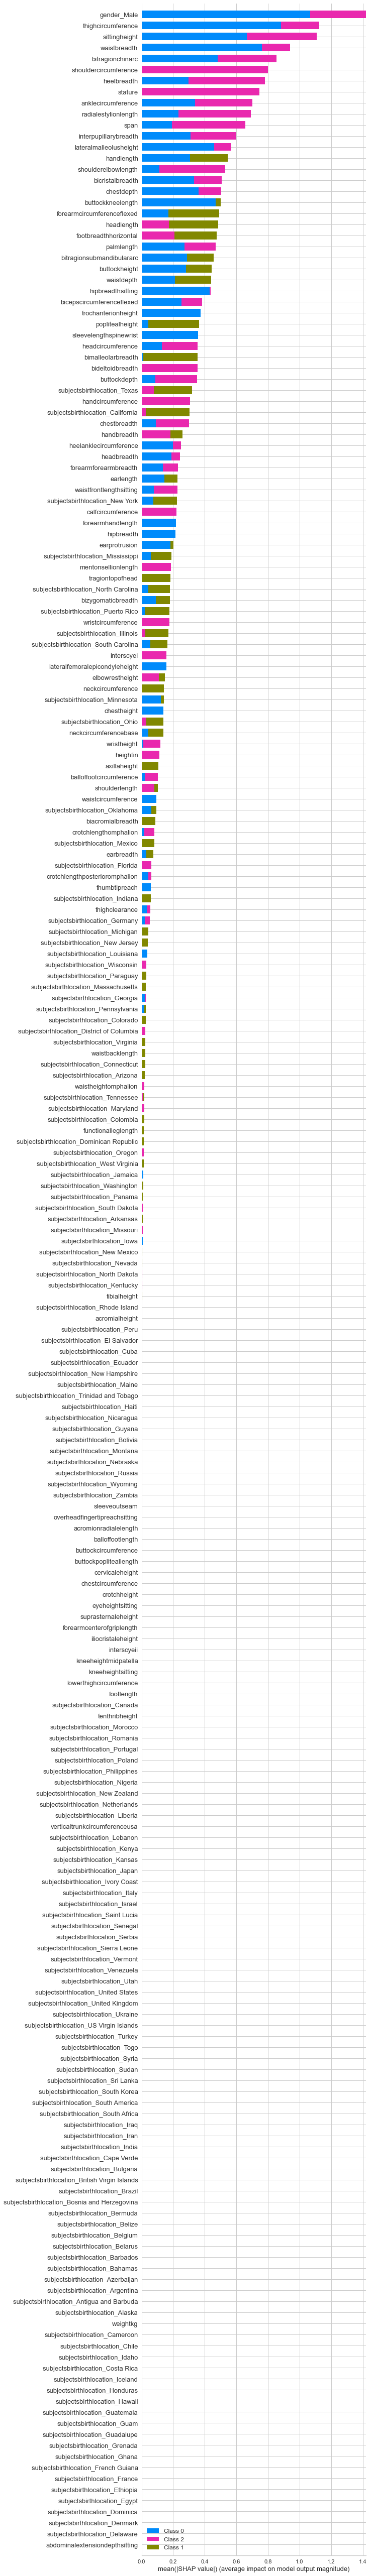

In [98]:
import shap

explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, max_display=300,feature_names = X.columns)

## SHAP for Feature Selection

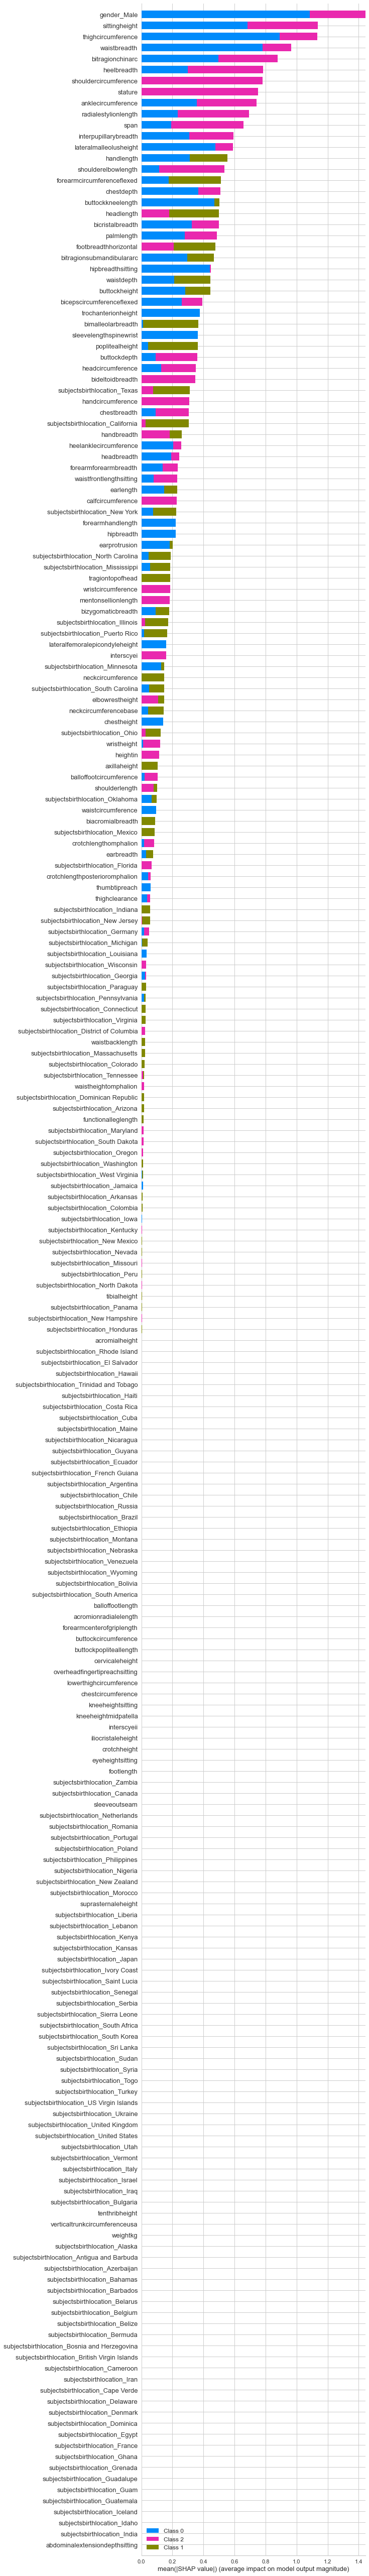

In [99]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [104]:
hispanic = ["subjectsbirthlocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight']

In [108]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.dodrace

In [109]:
X3.shape

(5769, 151)

In [110]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [111]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [112]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [113]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[214  14  32]
 [ 10 104  22]
 [101 128 529]]
              precision    recall  f1-score   support

       Black       0.66      0.82      0.73       260
    Hispanic       0.42      0.76      0.54       136
       White       0.91      0.70      0.79       758

    accuracy                           0.73      1154
   macro avg       0.66      0.76      0.69      1154
weighted avg       0.79      0.73      0.75      1154


Train_Set
[[ 875   55  108]
 [  33  439   71]
 [ 359  521 2154]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1038
    Hispanic       0.43      0.81      0.56       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.76      4615



In [114]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5365302
test_precision_Hispanic   0.4141786
test_recall_Hispanic      0.7641414
dtype: float64

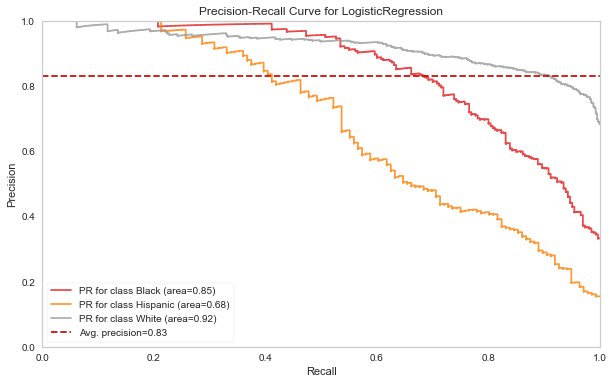

In [115]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

__Summary:__ With new set of features, the recall score is about 76%, which is quite good.

## SMOTE for X3 dataset

In [116]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [117]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [118]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [119]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[176  12  72]
 [  4  77  55]
 [ 34  39 685]]
              precision    recall  f1-score   support

       Black       0.82      0.68      0.74       260
    Hispanic       0.60      0.57      0.58       136
       White       0.84      0.90      0.87       758

    accuracy                           0.81      1154
   macro avg       0.76      0.72      0.73      1154
weighted avg       0.81      0.81      0.81      1154


Train_Set
[[ 727   36  275]
 [  25  288  230]
 [ 136  133 2765]]
              precision    recall  f1-score   support

       Black       0.82      0.70      0.75      1038
    Hispanic       0.63      0.53      0.58       543
       White       0.85      0.91      0.88      3034

    accuracy                           0.82      4615
   macro avg       0.76      0.71      0.74      4615
weighted avg       0.81      0.82      0.81      4615



In [120]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5318413
test_precision_Hispanic   0.5797160
test_recall_Hispanic      0.4934680
dtype: float64

## Find the best threshold for multiclassification

In [121]:
y2 = y.map({"Hispanic":1, "White":0, "Black":0})

In [122]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
5764    1
5765    1
5766    0
5767    1
5768    1
Name: dodrace, Length: 5769, dtype: int64

In [123]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size=0.2, random_state=101, stratify =y2)

In [124]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_shap_model2 = Pipeline(steps=operations)

In [125]:
pipe_shap_model2.fit(X_train4, y_train4)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [126]:
eval_metric(pipe_shap_model2, X_train4, y_train4, X_test4, y_test4)

Test_Set
[[816 202]
 [ 28 108]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1018
           1       0.35      0.79      0.48       136

    accuracy                           0.80      1154
   macro avg       0.66      0.80      0.68      1154
weighted avg       0.89      0.80      0.83      1154


Train_Set
[[3363  709]
 [  89  454]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      4072
           1       0.39      0.84      0.53       543

    accuracy                           0.83      4615
   macro avg       0.68      0.83      0.71      4615
weighted avg       0.91      0.83      0.85      4615



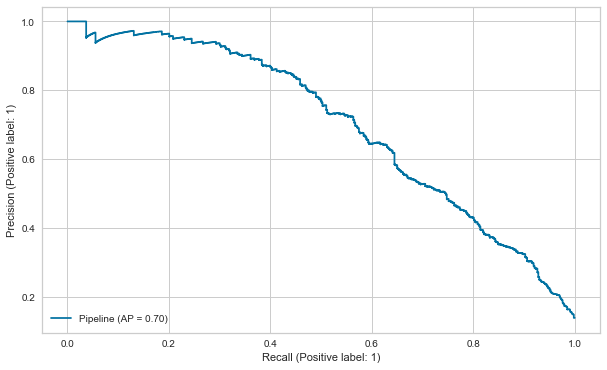

In [127]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(max_iter=10000,random_state=101))]
log_basic_model = Pipeline(steps=operations)

log_basic_model.fit(X_train4, y_train4)
plot_precision_recall_curve(log_basic_model, X_train4, y_train4);

In [128]:
y_pred_proba = log_basic_model.predict_proba(X_train4)
average_precision_score(y_train4, y_pred_proba[:,1])

0.6993272886308406

In [129]:
precisions, recalls, thresholds = precision_recall_curve(y_train4, y_pred_proba[:,1])

In [130]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2892389238482409

In [131]:
y_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_test4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [132]:
print(confusion_matrix(y_test4,y_pred2))
print(classification_report(y_test4,y_pred2))

[[659 359]
 [ 16 120]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1018
           1       0.25      0.88      0.39       136

    accuracy                           0.68      1154
   macro avg       0.61      0.76      0.58      1154
weighted avg       0.89      0.68      0.73      1154



In [133]:
y_train_pred2 = pd.Series(pipe_shap_model2.predict_proba(X_train4)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train4, y_train_pred2))
print(classification_report(y_train4, y_train_pred2))

[[2700 1372]
 [  33  510]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      4072
           1       0.27      0.94      0.42       543

    accuracy                           0.70      4615
   macro avg       0.63      0.80      0.61      4615
weighted avg       0.90      0.70      0.75      4615



In [134]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [135]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)
CV(10, model, X_train4, y_train4, optimal_threshold)

Accuracy      68.82%  std 1.85%
Precision-1   26.23%  std 1.51%
Recall-1      90.79%  std 4.52%
F1_score-1    40.69%  std 2.15%


After feature selection and reducing , the recall score for hispanic has increased to 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___